# Jupyter Notebooks - Chemistry Demos

A range of packages exist for rendering molecules in 2D and 3D and embedding the result in an Jupyter notebook code cell output.

## `pybel`

The `pybel` package wraps [OpenBabel](http://openbabel.org/docs/current/index.html), an application that supports the reading and writing of chemical information.

`pybel` can be used to render a compound described using [SMILES](http://opensmiles.org/spec/open-smiles.html).

In [1]:
import pybel

For example, we can generate a SMILES string such as {{m="CC(C)C(=O)C(C)C"; print(m)}} and then display the associated molecular diagram: {{mol = pybel.readstring( "smi",m ); mol}}

*Double click this markdown cell to see how to define the string and render the diagram.*

We can also save the string as a `.sdf` file, with 3D co-ordinates included.

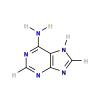

In [3]:
mol = pybel.readstring( "smi","C1=NC2=C(N1)C(=NC=N2)N" )

#Add hydrogens
mol.addh()

#Generate 3D co-ordinates
mol.make3D()
mol.write("sdf",'adenine.sdf',overwrite=True)
mol

### `moldesign`

The `moldesign` [Molecular Design Toolkit](https://autodesk.github.io/molecular-design-toolkit/index.html) package provides a wide range of tools for working with and visualising chemical data.

In [29]:
import moldesign as mdt
from moldesign import units as u

`moldesign` can read in and render compunds saved as `.sdf` files:

In [5]:
mol=mdt.read("adenine.sdf")
mol.draw()

A Jupyter Widget

We can also create objects directly from a SMILES string and report back some basic information about the corresponding compound:

For example: {{x= mdt.from_smiles("CC(C)C(=O)C(C)C") ; x}}


*Double click the cell to see how this report was generated.*

We can also visualise the same compound:

In [6]:
x.draw()

A Jupyter Widget

Models can be retrieved from the RCSB Protein Data Bank (PDB) by referring to the appropriate model ID.

For example, we can retrieve a model from PDB and then render it:

In [7]:
protease = mdt.from_pdb('3AID')
protease.draw()

A Jupyter Widget

More examples via https://iwatobipen.wordpress.com/2017/07/30/quantum-chemistry-calculation-with-python/

## `pubchempy`

The [`pubchempy` package](https://github.com/mcs07/PubChemPy) [[docs](http://pubchempy.readthedocs.io/en/latest/)] provides an interface to [PubChem](https://pubchem.ncbi.nlm.nih.gov/) that allows users to lookup compound structures by name.

In [8]:
import pubchempy as pcp
ethanol = pcp.get_compounds('ethanol', 'name')[0]
ethanol.canonical_smiles

'CCO'

In [9]:
#Look up by SMILES string
compound = pcp.get_compounds('CCO', 'smiles')[0]
compound.iupac_name

'ethanol'

By chaining together various packages, we can look up things by name and then render them.

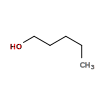

In [10]:
pentanol = pcp.get_compounds('pentanol', 'name')[0]
p = pybel.readstring( "smi", pentanol.canonical_smiles )
p

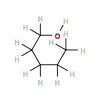

In [11]:
p.addh()
p

In [12]:
mdt.from_smiles(pentanol.canonical_smiles).draw()

A Jupyter Widget

We can also look up drugs by name.

In [13]:
pcp.get_compounds('aspirin', namespace='name')

[Compound(2244)]

Or by INCHI string:

In [14]:
pcp.get_compounds('InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)', namespace='inchi')

[Compound(2244)]

##  `chembl_webresource_client`

The [`chembl_webresource_client`](https://github.com/chembl/chembl_webresource_client) is "the only official Python client library developed and supported by ChEMBL group".

In [15]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('aspirin')

for r in res:
    pref_name = r['pref_name']
    if pref_name is not None:
        print(pref_name)

ASPIRIN
ASPIRIN EUGENOL ESTER
LYSINE ACETYLSALICYLATE


In [16]:
aspirin = [r for r in res if r['pref_name']=='ASPIRIN'][0]
aspirin['molecule_synonyms']

[{'molecule_synonym': '8-Hour Bayer',
  'syn_type': 'TRADE_NAME',
  'synonyms': '8-hour bayer'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'ATC',
  'synonyms': 'ACETYLSALICYLIC ACID'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'OTHER',
  'synonyms': 'ACETYLSALICYLIC ACID'},
 {'molecule_synonym': 'Aspirin', 'syn_type': 'BAN', 'synonyms': 'ASPIRIN'},
 {'molecule_synonym': 'Aspirin', 'syn_type': 'FDA', 'synonyms': 'ASPIRIN'},
 {'molecule_synonym': 'Aspirin', 'syn_type': 'JAN', 'synonyms': 'ASPIRIN'},
 {'molecule_synonym': 'Aspirin',
  'syn_type': 'TRADE_NAME',
  'synonyms': 'ASPIRIN'},
 {'molecule_synonym': 'Aspirin', 'syn_type': 'USP', 'synonyms': 'ASPIRIN'},
 {'molecule_synonym': 'Acetosalic Acid',
  'syn_type': 'TRADE_NAME',
  'synonyms': 'Acetosalic Acid'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'INN',
  'synonyms': 'Acetylsalicylic Acid'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'TRADE_NAME',
  'synonyms': '

In [17]:
aspirin['molecule_structures']

{'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O',
 'standard_inchi': 'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)',
 'standard_inchi_key': 'BSYNRYMUTXBXSQ-UHFFFAOYSA-N'}

## `pypdb`

`pydb` is a Python API for the [RCSB Protein Data Bank (PDB)](https://www.rcsb.org/pdb/home/home.do).

In [18]:
#https://github.com/williamgilpin/pypdb/blob/master/demos/demos.ipynb
from pypdb import *

search_dict = make_query('nitroglycerin')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['4FQF', '4FR8']


## `rdkit`

The [`rdkit` python package](https://github.com/rdkit/rdkit) provides an API to the [RDKit Open-Source Cheminformatics Linux Package](http://www.rdkit.org/).

We can create objects from SMILES strings and save them as image files in a variety of formats.

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
%matplotlib inline

mol_str = 'COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C'

m = Chem.MolFromSmiles( mol_str )
Draw.MolToFile(m,'cdk2_mol1.o.png')
Draw.MolToFile(m,'cdk2_mol1.o.svg')

For example, the `.png` file:

![](cdk2_mol1.o.png)

And the `.svg` file:

![](cdk2_mol1.o.svg)

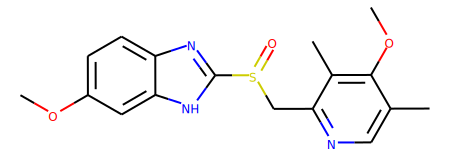

In [22]:
#Rendering of SVG was working, but has stopped?
#Revert to early demo from http://rdkit.blogspot.co.uk/2015/02/new-drawing-code.html
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

SVG(moltosvg(m))

In [27]:
Chem.MolToInchi(m)

'InChI=1S/C17H19N3O3S/c1-10-8-18-15(11(2)16(10)23-4)9-24(21)17-19-13-6-5-12(22-3)7-14(13)20-17/h5-8H,9H2,1-4H3,(H,19,20)/t24-/m0/s1'

## `nglview`

[`nglview`](https://github.com/arose/nglview) is a package that supports the 3D visualisation of molecular structures and trajectories.

In [28]:
import nglview as nv

# load "3pqr" from RCSB PDB and display viewer widget
nv.show_pdbid("3pqr")  

A Jupyter Widget